In [1]:
#OBJECTIVE: CASE STUDY INVOLVES- ANALYSING TRANSACTION DATA FROM THE FINANCIAL APPLICATION PHONEPE ALONG WITH DEMOGRAPHIC DATA 
#ACROSS VARIOUS STATES AND DISTRICTS IN INDIA.
#ANALYSE : 1-TRANSACTION TRENDS, 2-DEVICE USAGE, 3-DEMOGRAPHIC CORRELATIONS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#TASK:1 DATA LOADING AND UNDERSTANDING

#1.1: LOAD EACH DATASET AND DISPLAY ITS STRUCTURE

In [4]:
state_txn_users= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='State_Txn and Users')

In [5]:
state_txn_split= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='State_TxnSplit')

In [6]:
state_device_data= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='State_DeviceData')

In [7]:
district_txn_users= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='District_Txn and Users')

In [8]:
district_demographics= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='District Demographics')

In [9]:
admin= pd.read_excel('phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx',sheet_name='Admin')

C:\Users\HP\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [10]:
state_txn_users.head()  # First 5 rows 

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [11]:
state_txn_users.shape

(504, 8)

In [12]:
state_txn_split.tail(10) # Last 10 rows

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [13]:
state_txn_split.shape

(2514, 7)

In [14]:
state_device_data.iloc[2767:2778] # Middle value 10 rows : Mid value of Df is '2772' , (-5 rows '2772' + 5 rows)

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


In [15]:
state_device_data.shape

(5544, 6)

In [16]:
district_txn_users_head_tail = pd.concat([district_txn_users.head(10), district_txn_users.tail(10)])
district_txn_users_head_tail   # for 10 head and 10 tail

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


In [17]:
district_txn_users.shape

(10248, 10)

In [18]:
district_demographics.iloc[::10] # displaying every 10th row starting from 0 index

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


In [19]:
district_demographics.shape

(742, 8)

In [20]:
#1.2 BASIC STATS AND DATATYPES

In [21]:
state_txn_users.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


In [22]:
state_txn_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB


In [23]:
state_txn_split.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


In [24]:
state_txn_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 non-null   int64  
 2   Quarter           2514 non-null   int64  
 3   Transaction Type  2514 non-null   object 
 4   Transactions      2514 non-null   int64  
 5   Amount (INR)      2514 non-null   float64
 6   ATV (INR)         2514 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 137.6+ KB


In [25]:
state_device_data.describe()

,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


In [26]:
state_device_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             5544 non-null   object 
 1   Year              5544 non-null   int64  
 2   Quarter           5544 non-null   int64  
 3   Brand             5544 non-null   object 
 4   Registered Users  5544 non-null   int64  
 5   Percentage        5544 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 260.0+ KB


In [27]:
district_txn_users.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


In [28]:
district_txn_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10248 entries, 0 to 10247
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             10248 non-null  object 
 1   Year              10248 non-null  int64  
 2   Quarter           10248 non-null  int64  
 3   District          10248 non-null  object 
 4   Code              10220 non-null  object 
 5   Transactions      10248 non-null  int64  
 6   Amount (INR)      10248 non-null  float64
 7   ATV (INR)         10244 non-null  float64
 8   Registered Users  10248 non-null  int64  
 9   App Opens         10248 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 800.8+ KB


In [29]:
district_demographics.describe()

,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [30]:
district_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           742 non-null    object 
 1   District        742 non-null    object 
 2   Headquarters    742 non-null    object 
 3   Population      742 non-null    int64  
 4   Area (sq km)    742 non-null    float64
 5   Density         742 non-null    int64  
 6   Code            742 non-null    object 
 7   Alternate Name  742 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 46.5+ KB


In [31]:
#1.3: checking missing values

In [32]:
state_txn_users.isnull().sum()

State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

In [33]:
null_per_count_1= (state_txn_users.isnull().sum()*100/len(state_txn_users)).round(2)
null_per_count_1    # Amount column has 0.2 % of null values of total df

State               0.0
Year                0.0
Quarter             0.0
Transactions        0.0
Amount (INR)        0.2
ATV (INR)           0.0
Registered Users    0.0
App Opens           0.0
dtype: float64

In [34]:
state_txn_split.isnull().sum() # no null values

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

In [35]:
state_device_data.isnull().sum() # no null values

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

In [36]:
district_txn_users.isnull().sum()

State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

In [37]:
null_per_count_2=(district_txn_users.isnull().sum()*100/len(district_txn_users)).round(2)
null_per_count_2   # Code column has max null valuse- 0.27% of total df

State               0.00
Year                0.00
Quarter             0.00
District            0.00
Code                0.27
Transactions        0.00
Amount (INR)        0.00
ATV (INR)           0.04
Registered Users    0.00
App Opens           0.00
dtype: float64

In [38]:
district_demographics.isnull().sum()   # no null values

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [39]:
#1.4: Create a summary

In [40]:
#using district_txn_users since this df conatins both state and district data 
district_txn_users.head()

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [41]:
#1.4.1: calculating total number of states and UT and districts

print(len(district_txn_users['District'].unique()),"Total Number of Districts")

print(len(district_txn_users['State'].unique()),"Total Number of States and UT")


723 Total Number of Districts
36 Total Number of States and UT


In [42]:
# checking district count, number of times they appear
district_txn_users['District'].value_counts().nlargest(10)

District
South         28
Bilaspur      28
Balrampur     28
East          28
North         28
Aurangabad    28
West          28
Hamirpur      28
Pratapgarh    28
Firozepur     14
Name: count, dtype: int64

In [43]:
#checking district occurrence for respective states
district_txn_users['State'].value_counts().nlargest(10)

State
Uttar Pradesh     1050
Madhya Pradesh     728
Bihar              532
Tamil Nadu         518
Maharashtra        504
Assam              462
Rajasthan          462
Gujarat            462
Telangana          462
Karnataka          420
Name: count, dtype: int64

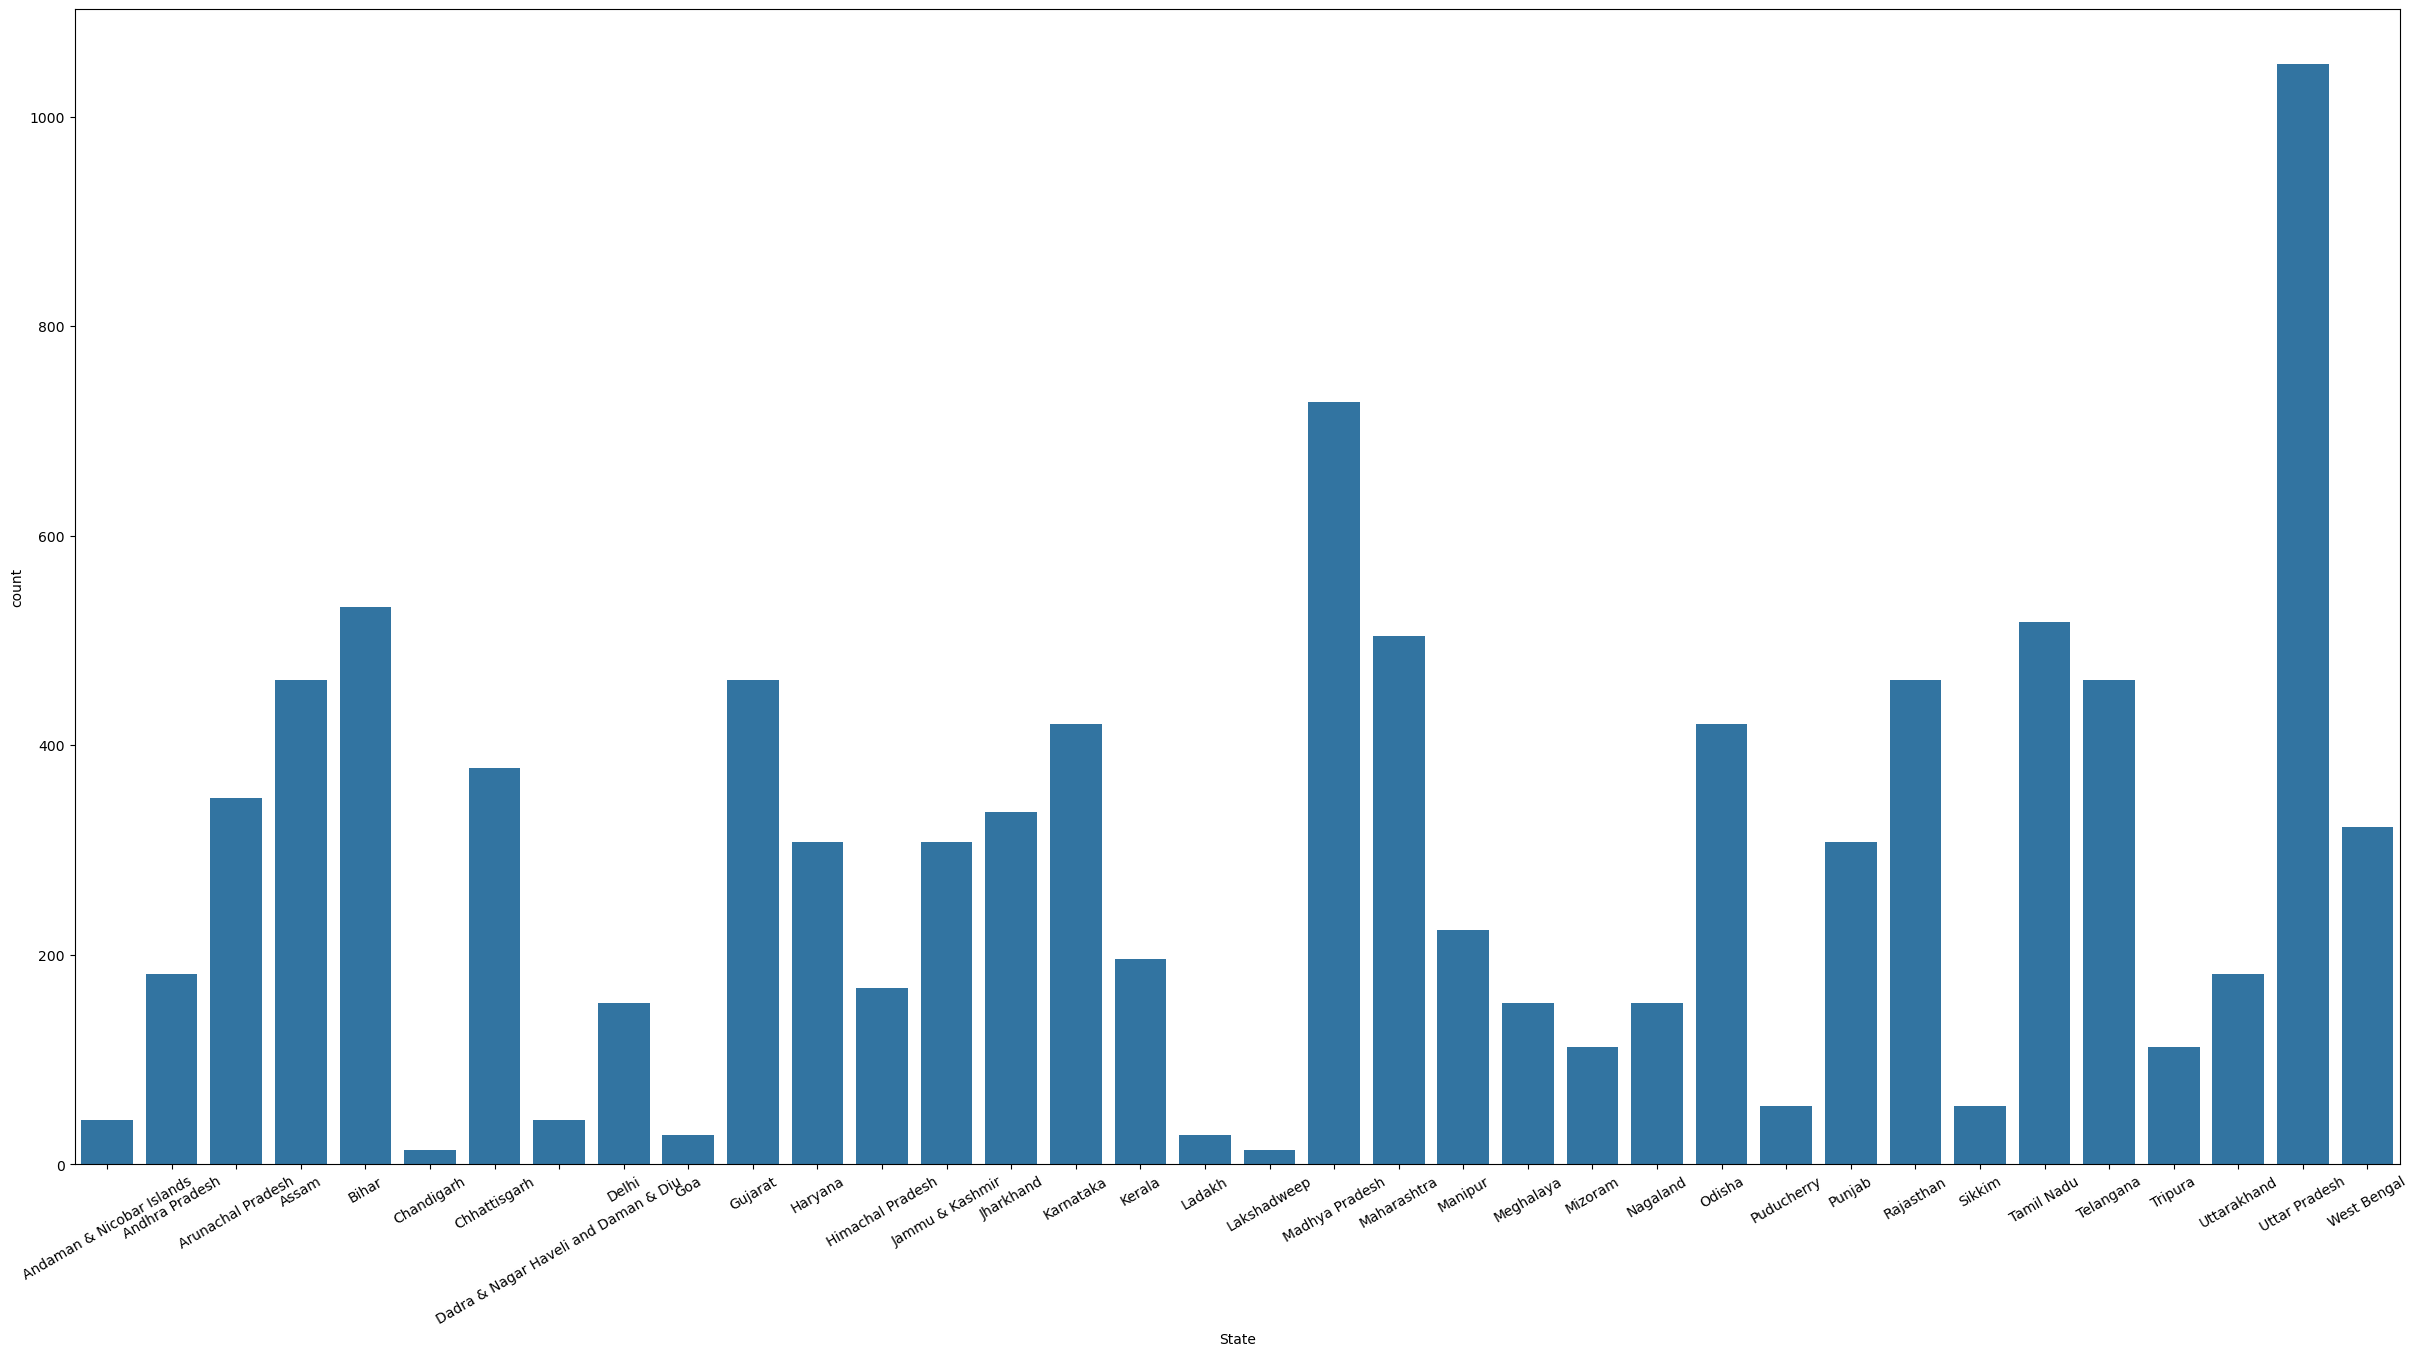

In [44]:
#plot for State count district wise
plt.figure(figsize=(30,15))
ax=sns.countplot(data=district_txn_users, x='State')
ax.tick_params(axis='x', rotation=30)

In [45]:
#1.4.2: Grouping state with district- for state having highest number of district
state_with_max_districts=district_txn_users.groupby('State')['District'].nunique().idxmax()
state_with_max_districts

'Uttar Pradesh'

In [46]:
# TASK 2 (EDA)
#2.1 ANALYZE TRANSACTION TRENDS OVER THE YEARS FOR EACH STATE

In [47]:
#2.1.1: TOTAL NUMBER OF TRANSACTION AND TOTAL TRANSACTION AMOUNT FOR EACH STATE

state_txn_users.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [48]:
#Printing total sum for transactions and amount(INR)

print("Total number of Transactions:", state_txn_users['Transactions'].sum() )
print("Total Amount (INR):", state_txn_users['Amount (INR)'].sum(), )


Total number of Transactions: 20532960294
Total Amount (INR): 35629160262599.375


In [49]:
#using loops for transaction sum state wise
p={}
for state_name in state_txn_users['State'].unique():
    state_data= state_txn_users[state_txn_users['State']==state_name]
    sum_transac= state_data['Transactions'].sum()
    p[state_name]= sum_transac

print(p)
    
    

{'Andaman & Nicobar Islands': 1223565, 'Andhra Pradesh': 1781091169, 'Arunachal Pradesh': 8043799, 'Assam': 123577981, 'Bihar': 713643889, 'Chandigarh': 25516542, 'Chhattisgarh': 241908549, 'Dadra & Nagar Haveli and Daman & Diu': 12462185, 'Delhi': 1011031124, 'Goa': 24481604, 'Gujarat': 612992823, 'Haryana': 567751410, 'Himachal Pradesh': 52987445, 'Jammu & Kashmir': 45053328, 'Jharkhand': 275270987, 'Karnataka': 2981044533, 'Kerala': 223637876, 'Ladakh': 1880109, 'Lakshadweep': 71610, 'Madhya Pradesh': 1100253728, 'Maharashtra': 2833670154, 'Manipur': 12318043, 'Meghalaya': 5648913, 'Mizoram': 2162776, 'Nagaland': 5864977, 'Odisha': 740479146, 'Puducherry': 17292386, 'Punjab': 181336904, 'Rajasthan': 1382918930, 'Sikkim': 6483948, 'Tamil Nadu': 800399873, 'Telangana': 2347430243, 'Tripura': 12018152, 'Uttarakhand': 124011162, 'Uttar Pradesh': 1314714390, 'West Bengal': 942286041}


In [51]:
#using group_by for tabular output for total number of transaction, state wise and year wise
state_txn_users.groupby(['State','Year'])['Transactions'].sum().reset_index()


,State,Year,Transactions
0,Andaman & Nicobar Islands,2018,58021
1,Andaman & Nicobar Islands,2019,133104
2,Andaman & Nicobar Islands,2020,446274
3,Andaman & Nicobar Islands,2021,586166
4,Andhra Pradesh,2018,77779112
...,...,...,...
139,Uttarakhand,2021,44608834
140,West Bengal,2018,120011635
141,West Bengal,2019,257900590
142,West Bengal,2020,304222327


In [53]:
#using group_by for tabular output for DESCENDING transaction sum, year and state wise 
state_txn_users_sort_tranc=state_txn_users.groupby(['State','Year'])['Transactions'].sum().reset_index().sort_values(['Transactions'], ascending=False)
state_txn_users_sort_tranc

,State,Year,Transactions
62,Karnataka,2020,1216153117
82,Maharashtra,2020,1099666770
83,Maharashtra,2021,1091476726
63,Karnataka,2021,1054446538
126,Telangana,2020,931480581
...,...,...,...
0,Andaman & Nicobar Islands,2018,58021
74,Lakshadweep,2020,32610
75,Lakshadweep,2021,20469
73,Lakshadweep,2019,12276


<Axes: xlabel='State', ylabel='Transactions'>

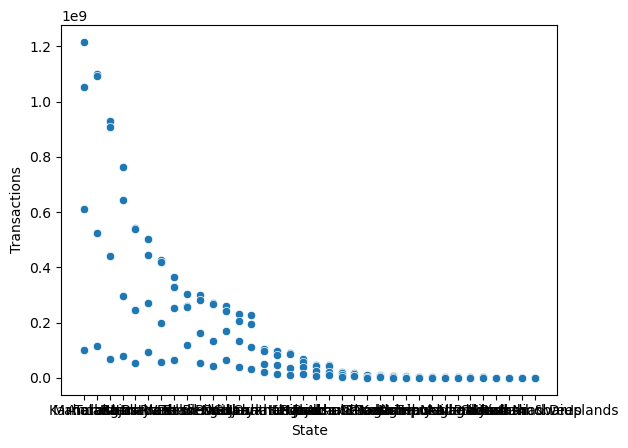

In [55]:
# plot for visual represntation of DESCENDING transaction sum, year and state wise
sns.scatterplot(data=state_txn_users_sort_tranc, x='State', y='Transactions')

In [ ]:
#2.1.2(A): 5 states with highest values and 5 states with lowest values for Transactions column
# USED 2 COLUMNS TRANSACTION AND AMOUNT FOR 2.1.2(A-B)

# OBSERVATION:  KARNATAKA WITH HIGHEST NUMBER OF TRANSACTION IN YEAR 2020 (1216153117)
#               LAKSHADWEEP WITH LOWEST NUMBER OF TRANSACTION IN YEAR 2018 (6255)

In [57]:
state_txn_users_sort_tranc.nsmallest(5,'Transactions') # for checking 5 smallest value based on transactions val

,State,Year,Transactions
72,Lakshadweep,2018,6255
73,Lakshadweep,2019,12276
75,Lakshadweep,2021,20469
74,Lakshadweep,2020,32610
0,Andaman & Nicobar Islands,2018,58021


In [67]:
unique_states_tranc_sort_low = state_txn_users_sort_tranc.drop_duplicates(subset='State', keep='first') # Dropping duplicates State for getting smallest 5 transac. state
unique_states_tranc_sort_low.iloc[-5:]

,State,Year,Transactions
118,Sikkim,2020,2377319
94,Mizoram,2020,929381
70,Ladakh,2020,831785
3,Andaman & Nicobar Islands,2021,586166
74,Lakshadweep,2020,32610


In [63]:
state_txn_users_sort_tranc.nlargest(5,'Transactions') # for checking 5 largest value based on transactions val

,State,Year,Transactions
62,Karnataka,2020,1216153117
82,Maharashtra,2020,1099666770
83,Maharashtra,2021,1091476726
63,Karnataka,2021,1054446538
126,Telangana,2020,931480581


In [121]:
unique_states_tranc_sort_high = state_txn_users_sort_tranc.drop_duplicates(subset='State', keep='first') 
unique_states_tranc_sort_high.iloc[:5]   # Dropping duplicates State for getting largest 5 transac. state

,State,Year,Transactions
62,Karnataka,2020,1216153117
82,Maharashtra,2020,1099666770
126,Telangana,2020,931480581
6,Andhra Pradesh,2020,763616699
114,Rajasthan,2020,543585579


In [71]:
#using group_by for tabular output for total AMOUNT in INR
state_txn_users_amnt =state_txn_users.groupby(['State','Year'])['Amount (INR)'].sum().reset_index()
state_txn_users_amnt

,State,Year,Amount (INR)
0,Andaman & Nicobar Islands,2018,1.890761e+08
1,Andaman & Nicobar Islands,2019,4.734648e+08
2,Andaman & Nicobar Islands,2020,1.296423e+09
3,Andaman & Nicobar Islands,2021,1.682854e+09
4,Andhra Pradesh,2018,1.220720e+11
...,...,...,...
139,Uttarakhand,2021,7.727901e+10
140,West Bengal,2018,1.115887e+11
141,West Bengal,2019,2.660145e+11
142,West Bengal,2020,5.527316e+11


In [73]:
#using group_by for tabular output for total amount (INR) DESCENDING with respect to state and year
state_txn_users_sort_amnt=state_txn_users_amnt.groupby(['State','Year'])['Amount (INR)'].sum().reset_index().sort_values(['Amount (INR)'], ascending=False)
state_txn_users_sort_amnt

,State,Year,Amount (INR)
126,Telangana,2020,1.895187e+12
127,Telangana,2021,1.827318e+12
62,Karnataka,2020,1.803284e+12
83,Maharashtra,2021,1.685002e+12
82,Maharashtra,2020,1.678817e+12
...,...,...,...
0,Andaman & Nicobar Islands,2018,1.890761e+08
74,Lakshadweep,2020,8.186344e+07
75,Lakshadweep,2021,5.442625e+07
73,Lakshadweep,2019,3.895033e+07


<Axes: xlabel='State', ylabel='Amount (INR)'>

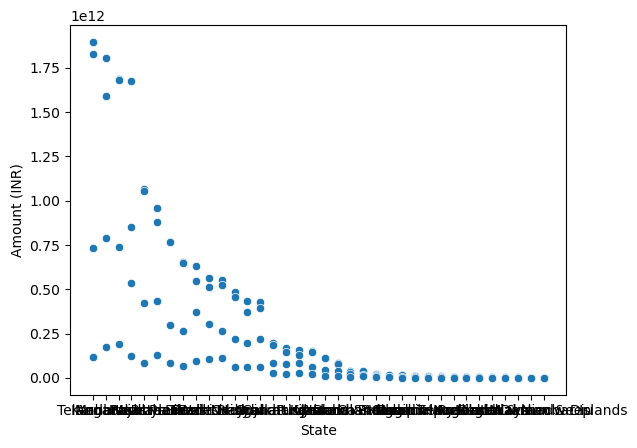

In [75]:
# plot for visual represntation of DESCENDING AMOUNT (INR) sum, year and state wise

sns.scatterplot(data=state_txn_users_sort_amnt, x='State', y='Amount (INR)')

In [ ]:
#2.1.2(B): 5 states with highest values and 5 states with lowest values for Amount INR Column

# OBSERVATION:  TELANGANA WITH HIGHEST NUMBER OF TRANSACTION IN YEAR 2020 Telanga (1.895187e+12)
#               LAKSHADWEEP WITH LOWEST NUMBER OF TRANSACTION IN YEAR 2020	(8.186344e+07)           

In [77]:
state_txn_users_sort_amnt.nsmallest(5,'Amount (INR)') # for checking 5 smallest value based on  Amount (INR) val

,State,Year,Amount (INR)
72,Lakshadweep,2018,1.691867e+07
73,Lakshadweep,2019,3.895033e+07
75,Lakshadweep,2021,5.442625e+07
74,Lakshadweep,2020,8.186344e+07
0,Andaman & Nicobar Islands,2018,1.890761e+08


In [97]:
a=state_txn_users_sort_amnt.drop_duplicates(subset='State', keep='first').iloc[-5:] # Dropping duplicates State for getting small 5 Amnt state
a

,State,Year,Amount (INR)
90,Meghalaya,2020,5.315172e+09
70,Ladakh,2020,2.848884e+09
94,Mizoram,2020,2.543737e+09
3,Andaman & Nicobar Islands,2021,1.682854e+09
74,Lakshadweep,2020,8.186344e+07


In [81]:
state_txn_users_sort_amnt.nlargest(5,'Amount (INR)') # for checking 5 highest value based on  Amount (INR) val

,State,Year,Amount (INR)
126,Telangana,2020,1.895187e+12
127,Telangana,2021,1.827318e+12
62,Karnataka,2020,1.803284e+12
83,Maharashtra,2021,1.685002e+12
82,Maharashtra,2020,1.678817e+12


In [119]:
state_txn_users_sort_amnt.drop_duplicates(subset='State', keep='first').iloc[:5] # Dropping duplicates State for getting 5 high Amnt state

,State,Year,Amount (INR)
126,Telangana,2020,1.895187e+12
62,Karnataka,2020,1.803284e+12
83,Maharashtra,2021,1.685002e+12
6,Andhra Pradesh,2020,1.677247e+12
114,Rajasthan,2020,1.063785e+12


In [ ]:
#2.2: IDENTIFY THE MOST COMMON TRANSACTION TYPES IN EACH STATE AND QUARTER


In [127]:
state_txn_split.head()

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


In [135]:
#using group_by for tabular output with lambda funtion aggregation to get mode list
state_txn_split.groupby(['State','Quarter'])['Transaction Type'].agg(lambda x: x.mode().tolist()).reset_index()


,State,Quarter,Transaction Type
0,Andaman & Nicobar Islands,1,"[Financial Services, Merchant payments, Others..."
1,Andaman & Nicobar Islands,2,"[Financial Services, Merchant payments, Others..."
2,Andaman & Nicobar Islands,3,"[Financial Services, Merchant payments, Others..."
3,Andaman & Nicobar Islands,4,"[Financial Services, Merchant payments, Others..."
4,Andhra Pradesh,1,"[Financial Services, Merchant payments, Others..."
...,...,...,...
139,Uttarakhand,4,"[Financial Services, Merchant payments, Others..."
140,West Bengal,1,"[Financial Services, Merchant payments, Others..."
141,West Bengal,2,"[Financial Services, Merchant payments, Others..."
142,West Bengal,3,"[Financial Services, Merchant payments, Others..."


In [139]:
state_txn_split.groupby(['State', 'Quarter'])['Transaction Type'].agg(lambda x: x.mode().iloc[0]).reset_index()

#using iloc for getting most frequent within the quarter list

,State,Quarter,Transaction Type
0,Andaman & Nicobar Islands,1,Financial Services
1,Andaman & Nicobar Islands,2,Financial Services
2,Andaman & Nicobar Islands,3,Financial Services
3,Andaman & Nicobar Islands,4,Financial Services
4,Andhra Pradesh,1,Financial Services
...,...,...,...
139,Uttarakhand,4,Financial Services
140,West Bengal,1,Financial Services
141,West Bengal,2,Financial Services
142,West Bengal,3,Financial Services


In [ ]:
#2.3: Device brand with highest number of registered users in each state

In [191]:
state_device_data.head()

,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


In [205]:
state_device_data.groupby(['State','Brand'])['Registered Users'].sum() # State wise brand total Registered Users

State                      Brand   
Andaman & Nicobar Islands  Apple           9334
                           Huawei         11497
                           Lenovo          5362
                           Motorola        9491
                           OnePlus        15397
                                         ...   
West Bengal                Others      17526532
                           Realme       9322038
                           Samsung     30516315
                           Vivo        18755122
                           Xiaomi      38265764
Name: Registered Users, Length: 448, dtype: int64

In [193]:
# State wise brand MAXIMUM registered users
state_device_data.groupby(['State','Brand'])['Registered Users'].sum().reset_index().sort_values(['State','Registered Users'],ascending=False).drop_duplicates(subset=['State'])

,State,Brand,Registered Users
447,West Bengal,Xiaomi,38265764
434,Uttarakhand,Xiaomi,5519705
421,Uttar Pradesh,Xiaomi,64303360
406,Tripura,Xiaomi,913017
393,Telangana,Xiaomi,38954882
382,Tamil Nadu,Xiaomi,31519236
368,Sikkim,Samsung,406392
356,Rajasthan,Xiaomi,33767499
343,Punjab,Xiaomi,11064360
329,Puducherry,Xiaomi,637639


In [ ]:
#2.4: create a list of top district per state based on population

#2.4.1: for each state with highest population

In [195]:
district_demographics.head()

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [199]:
district_demographics.groupby(['State','District'])['Population'].sum() # District wise total population

State                      District                
Andaman & Nicobar Islands  Nicobar                       36842
                           North and Middle Andaman     105597
                           South Andaman                238142
Andhra Pradesh             Anantapur                   4083315
                           Chittoor                    4170468
                                                        ...   
West Bengal                Purba Bardhaman             4835532
                           Purba Medinipur             5095875
                           Purulia                     2927965
                           South 24 Parganas           8161961
                           Uttar Dinajpur              3000849
Name: Population, Length: 742, dtype: int64

In [209]:
# state wise district with max population
district_max_population=district_demographics.groupby(['State','District'])['Population'].sum().reset_index().sort_values(['State','Population'],ascending=False).drop_duplicates(subset=['State'])
district_max_population

,State,District,Population
734,West Bengal,North 24 Parganas,10082852
711,Uttarakhand,Haridwar,1927029
633,Uttar Pradesh,Allahabad,5959798
630,Tripura,West Tripura,917534
592,Telangana,Hyderabad,3943323
554,Tamil Nadu,Chennai,7139882
548,Sikkim,East Sikkim,281293
530,Rajasthan,Jaipur,6663971
503,Punjab,Ludhiana,3487882
490,Puducherry,Puducherry,950289


In [ ]:
#2.4.2 create a column chart depicting district highest population for each state

In [223]:
district_max_population['DistrictState'] = district_max_population['District'] + ' (' + district_max_population['State'] + ')'

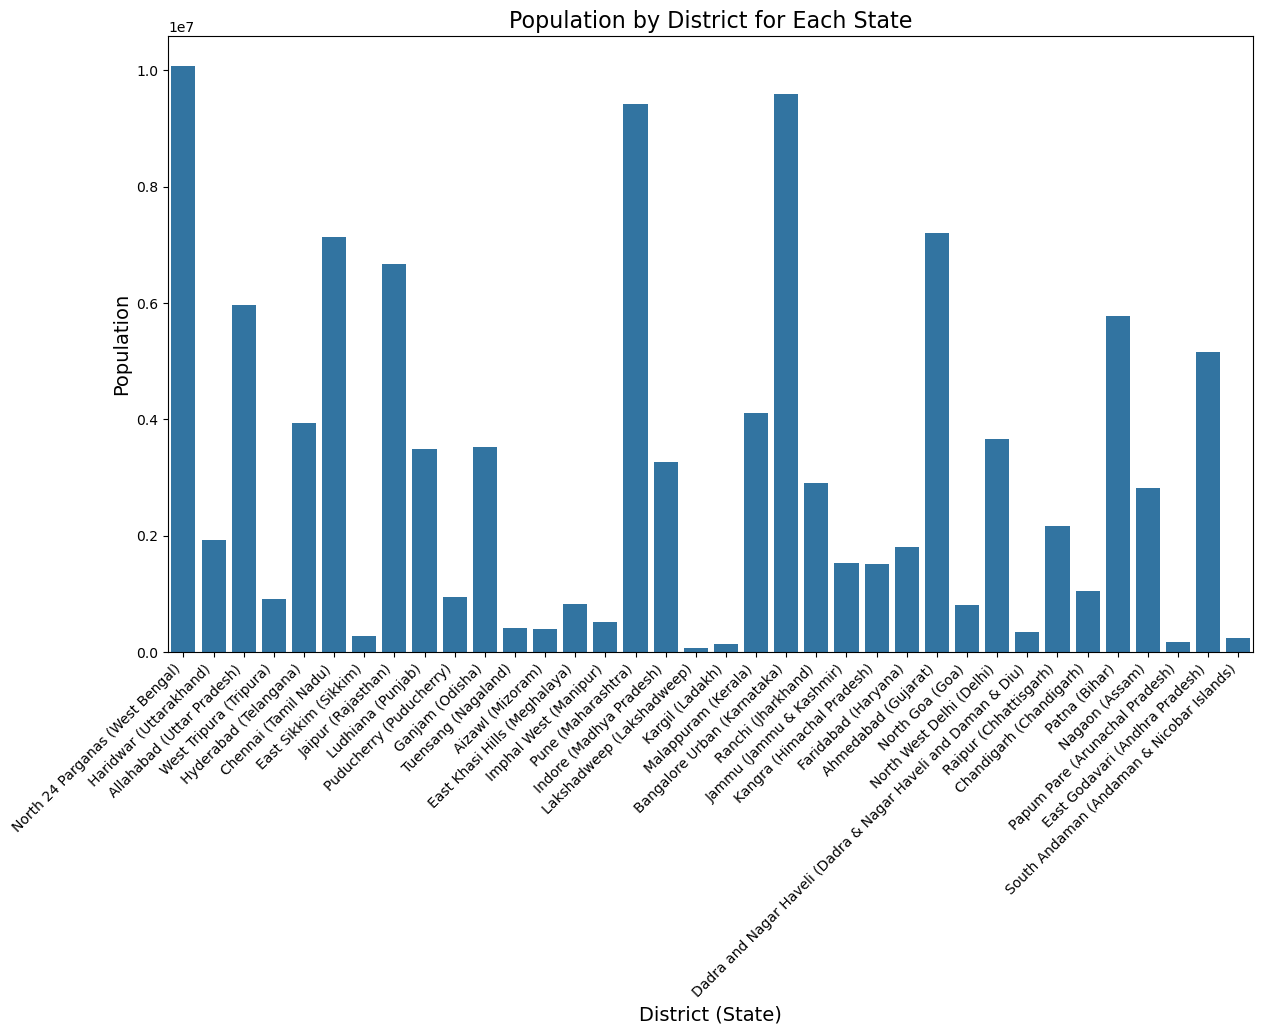

In [229]:
plt.figure(figsize=(14, 8))
sns.barplot(data=district_max_population, x='DistrictState', y='Population')

plt.title('Population by District for Each State', fontsize=16)
plt.xlabel('District (State)', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#2.5: calculate avg transac(ATV) for each state

In [ ]:
#2.5.1: calculate ATV for each state

In [231]:
state_txn_users.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [261]:
state_atv_sum =state_txn_users.groupby('State')['ATV (INR)'].sum().reset_index()
state_atv_sum

,State,ATV (INR)
0,Andaman & Nicobar Islands,44229.729913
1,Andhra Pradesh,24473.280668
2,Arunachal Pradesh,36936.535789
3,Assam,28118.939181
4,Bihar,28326.437694
5,Chandigarh,29593.159044
6,Chhattisgarh,23111.460632
7,Dadra & Nagar Haveli and Daman & Diu,20823.538391
8,Delhi,22257.750300
9,Goa,26533.619691


In [285]:
#2.5.2: 5 high and 5 low Value ATV (INR)

In [275]:
state_atv_sort =state_txn_users.groupby('State')['ATV (INR)'].sum().reset_index().sort_values(['ATV (INR)'], ascending=False)

In [287]:
state_atv_sort # sorting data in descending order

,State,ATV (INR)
17,Ladakh,47715.121781
0,Andaman & Nicobar Islands,44229.729913
23,Mizoram,40985.249221
18,Lakshadweep,38865.661810
2,Arunachal Pradesh,36936.535789
21,Manipur,36697.160585
24,Nagaland,36539.196265
13,Jammu & Kashmir,35119.084401
5,Chandigarh,29593.159044
29,Sikkim,29229.813452


In [283]:
state_atv_sum.nlargest(5,'ATV (INR)') #5 states with highest ATV (INR)

,State,ATV (INR)
17,Ladakh,47715.121781
0,Andaman & Nicobar Islands,44229.729913
23,Mizoram,40985.249221
18,Lakshadweep,38865.661810
2,Arunachal Pradesh,36936.535789


In [281]:
state_atv_sum.nsmallest(5,'ATV (INR)') #5 states with lowest ATV(INR)

,State,ATV (INR)
35,West Bengal,19230.408260
25,Odisha,19993.923141
7,Dadra & Nagar Haveli and Daman & Diu,20823.538391
20,Maharashtra,21229.065480
15,Karnataka,21243.491492


In [ ]:
#2.6: Analyse app usage

In [ ]:
#2.6.1: calculate total number of apps open over the years and quarters for each state

In [289]:
district_txn_users.head()

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [307]:
app_opens=district_txn_users.groupby(['State','Year','Quarter'])['App Opens'].sum().reset_index() # for state wise, specific year and quarters
app_opens

,State,Year,Quarter,App Opens
0,Andaman & Nicobar Islands,2018,1,0
1,Andaman & Nicobar Islands,2018,2,0
2,Andaman & Nicobar Islands,2018,3,0
3,Andaman & Nicobar Islands,2018,4,0
4,Andaman & Nicobar Islands,2019,1,0
...,...,...,...,...
499,West Bengal,2020,2,198589332
500,West Bengal,2020,3,246554831
501,West Bengal,2020,4,291721919
502,West Bengal,2021,1,316832674


In [ ]:
#2.6.2: identify trends in app usage by creating a line plot for no of apps open over time for a specific state 

In [327]:
wb_app_data=app_opens[app_opens['State']=='West Bengal']
wb_app_data   # selecting WEST BENGAL state for plotting

,State,Year,Quarter,App Opens
490,West Bengal,2018,1,0
491,West Bengal,2018,2,0
492,West Bengal,2018,3,0
493,West Bengal,2018,4,0
494,West Bengal,2019,1,0
495,West Bengal,2019,2,49514201
496,West Bengal,2019,3,176559011
497,West Bengal,2019,4,244326613
498,West Bengal,2020,1,207068218
499,West Bengal,2020,2,198589332


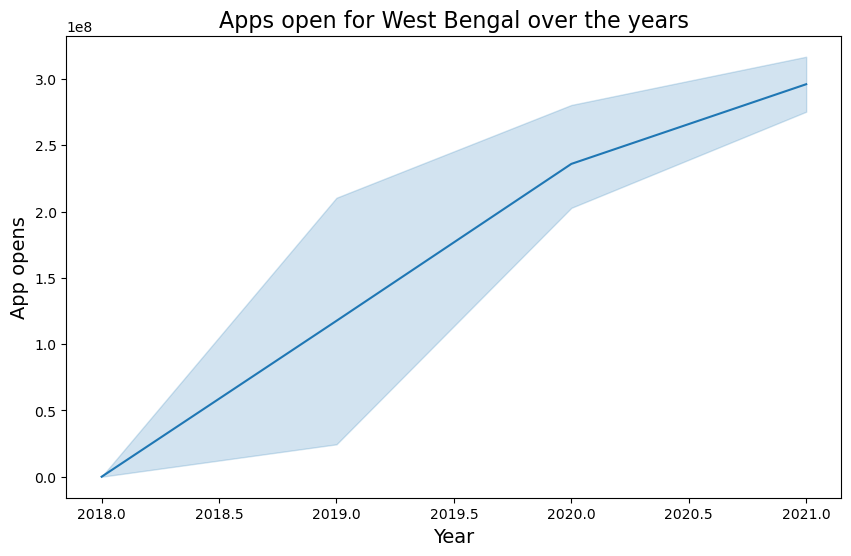

In [331]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=wb_app_data, x='Year', y='App Opens')

plt.title('Apps open for West Bengal over the years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('App opens', fontsize=14)

plt.show()

In [ ]:
#OBSERVATION from graph: 2018-2020 app usage growth was steady with large volume of users,  
# After 2020 its usage gets deflected(bend) from its original growth and also the volume started shrinking   

In [ ]:
# 2.7: Distribution of transaction type

In [ ]:
#2.7.1: create bar chart distribution of different transaction types for each state for most recent quarter

In [337]:
state_txn_split.head()

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


In [397]:
latest_qtr = state_txn_split['Quarter'].max() #getting latest quarters i.e: 4
latest_data = state_txn_split[state_txn_split['Quarter'] == latest_qtr] # filter for latest quarter

txn_summary = latest_data.groupby(['State', 'Transaction Type'])['Transactions'].sum().reset_index() # Group and sum transactions

In [399]:
txn_summary

,State,Transaction Type,Transactions
0,Andaman & Nicobar Islands,Financial Services,1054
1,Andaman & Nicobar Islands,Merchant payments,63732
2,Andaman & Nicobar Islands,Others,2465
3,Andaman & Nicobar Islands,Peer-to-peer payments,110018
4,Andaman & Nicobar Islands,Recharge & bill payments,106179
...,...,...,...
175,West Bengal,Financial Services,1566899
176,West Bengal,Merchant payments,52898823
177,West Bengal,Others,1469407
178,West Bengal,Peer-to-peer payments,130629804


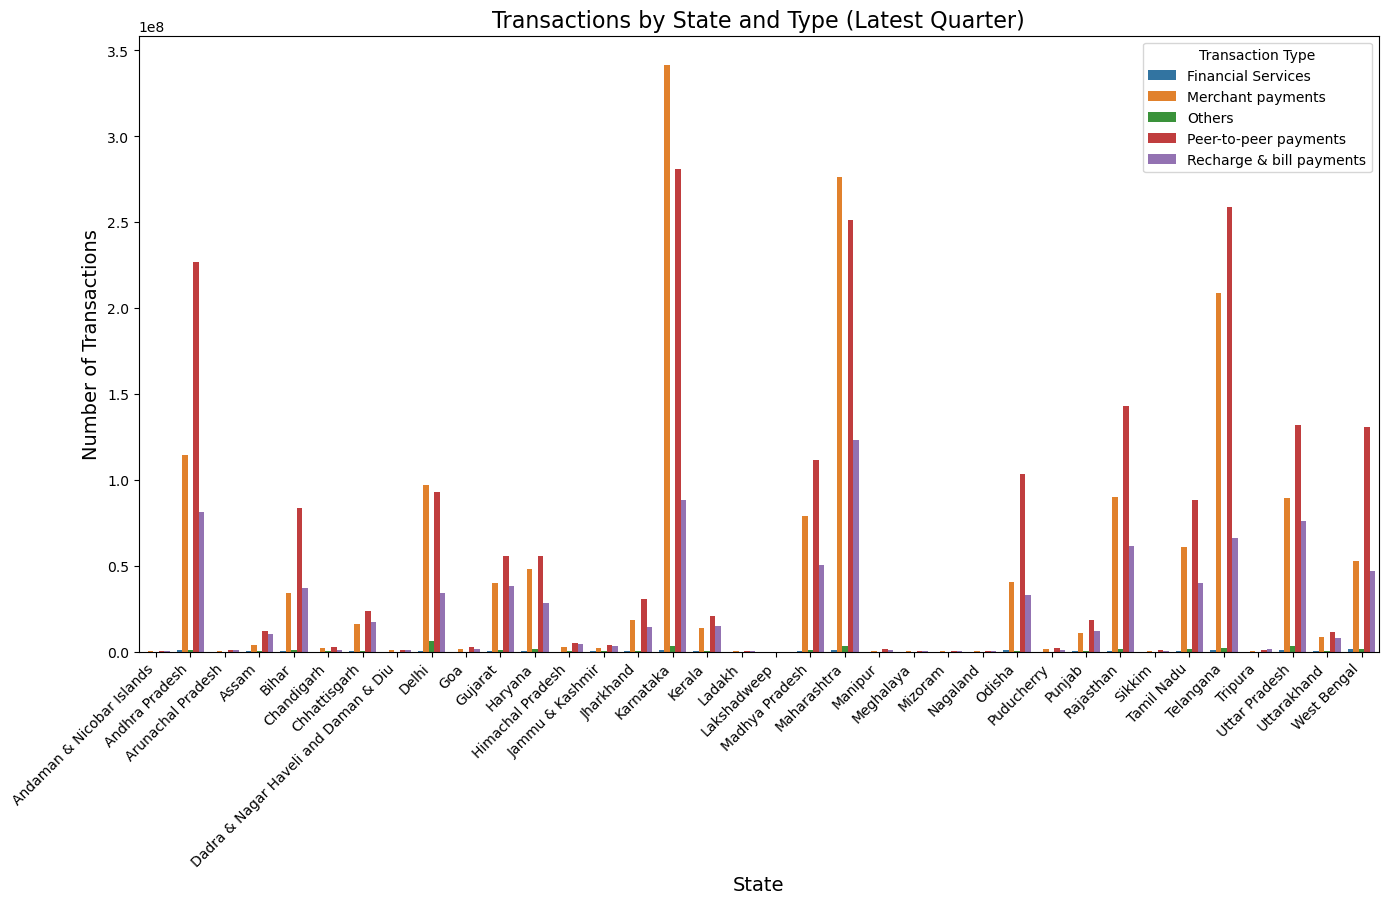

In [395]:
plt.figure(figsize=(16, 8))

sns.barplot(
    data=txn_summary,
    x='State',
    y='Transactions',
    hue='Transaction Type',
)

plt.title('Transactions by State and Type (Latest Quarter)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.legend(title='Transaction Type')
plt.show()


In [401]:
#OBSERVATION: KARNATAKA has the heighset number of transactions- Merchant payments and peer-peer payments
# followed by Maharastra, Telengana, & Andhra pradesh

In [ ]:
#2.8: find unique mapping between district name and district code

In [ ]:
#2.8.1: identify unique mapping between district name and district code from df

In [407]:
district_demographics.head()

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [463]:
district_demographics[['District','Code']].drop_duplicates()

,District,Code
0,Anantapur,AP01
1,Chittoor,AP02
2,East Godavari,AP03
3,Guntur,AP04
4,YSR,AP13
...,...,...
737,West Delhi,DL11
738,Karaikal,PY01
739,Mahé,PY02
740,Puducherry,PY03


In [467]:
unique_mapping=district_demographics[['District', 'Code']].drop_duplicates()
unique_mapping

,District,Code
0,Anantapur,AP01
1,Chittoor,AP02
2,East Godavari,AP03
3,Guntur,AP04
4,YSR,AP13
...,...,...
737,West Delhi,DL11
738,Karaikal,PY01
739,Mahé,PY02
740,Puducherry,PY03


In [469]:
#checking for non-unique mapping elements
is_unique_mapping = (
    unique_mapping['District'].is_unique and
    unique_mapping['Code'].is_unique
)

print("One-to-one mapping between District and Code:", is_unique_mapping)

One-to-one mapping between District and Code: False


In [483]:
# checking duplicated values for district
dupe_districts = unique_mapping[unique_mapping.duplicated('District', keep=False)]
print("Districts with multiple codes:\n", dupe_districts)

Districts with multiple codes:
        District  Code
74   Aurangabad  BR03
112   Balrampur  CG03
115     Bijapur  CG06
116    Bilaspur  CG07
195    Bilaspur  HP01
197    Hamirpur  HP03
237     Bijapur  KA07
334  Aurangabad  MH04
496  Pratapgarh  RJ26
597   Balrampur  UP12
620    Hamirpur  UP35
646  Pratapgarh  UP61


In [ ]:
#2.8.2: create csv file containing the unique ditrict name and district code mapping and export csv

In [487]:
unique_mapping.to_csv("unique_district_mapping.csv",index=False)

In [567]:
#TASK 3: Data Quality Checks

In [ ]:
#3.1: Ensure data consistency across state and district levels

In [ ]:
#3.1.1: for each state, cal total number of transactions, toatl transaction amount and total registered users by summing up the values

In [489]:
district_txn_users.head()

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


In [553]:
#grouping district wise data
district_acc=district_txn_users.groupby('District')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()
district_acc

,District,Transactions,Amount (INR),Registered Users
0,Adilabad,8685154,2.007697e+10,1108931
1,Agar Malwa,4782967,1.093772e+10,714917
2,Agra,33977462,6.414806e+10,8068168
3,Ahmadabad,222831155,4.102147e+11,26575415
4,Ahmednagar,80468053,1.465034e+11,10952759
...,...,...,...,...
718,Yamunanagar,7544142,1.618554e+10,2210118
719,Yanam,993575,1.996880e+09,111961
720,Yavatmal,16243860,2.839347e+10,3281220
721,Ysr,93524599,2.405521e+11,8818696


In [555]:
# grouping district and state wise data for a common column to compare 
district_acc_agg=district_txn_users.groupby(['State','District'])[['Transactions','Amount (INR)','Registered Users']].sum()
district_acc_agg

Transactions  \
State                     District                                   
Andaman & Nicobar Islands Nicobars                           59387   
                          North And Middle Andaman          149394   
                          South Andaman                    1014784   
Andhra Pradesh            Anantapur                      124411535   
                          Chittoor                       181284289   
...                                                            ...   
West Bengal               Purba Bardhaman                 45668162   
                          Purba Medinipur                 43394953   
                          Purulia                         18265697   
                          South Twenty Four Parganas      44715760   
                          Uttar Dinajpur                  13040415   

                                                      Amount (INR)  \
State                     District                                   
Andaman & Nicobar Islands Nicobars                    2.290015e+08   
                          North And Middle Andaman    3.631200e+08   
                          South Andaman               3.049696e+09   
Andhra Pradesh            Anantapur                   2.795880e+11   
                          Chittoor                    3.533273e+11   
...                                                            ...   
West Bengal               Purba Bardhaman             5.185648e+10   
                          Purba Medinipur             7.362676e+10   
                          Purulia                     1.560582e+10   
                          South Twenty Four Parganas  6.959206e+10   
                          Uttar Dinajpur              2.603368e+10   

                                                      Registered Users  
State                     District                                      
Andaman & Nicobar Islands Nicobars                               12179  
                          North And Middle Andaman               50523  
                          South Andaman                         345694  
Andhra Pradesh            Anantapur                           11857400  
                          Chittoor                            15248543  
...                                                                ...  
West Bengal               Purba Bardhaman                      6445210  
                          Purba Medinipur                      7564653  
                          Purulia                              3566946  
                          South Twenty Four Parganas           9878400  
                          Uttar Dinajpur                       2981254  

[732 rows x 3 columns]

In [557]:
# taking only state data so that makes easier to compare from stae-district table
district_sum = district_acc_agg.groupby('State').sum(numeric_only=True).reset_index()

In [559]:
district_sum

,State,Transactions,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


In [551]:
#grouping state wise data
state_acc=district_txn_users.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()
state_acc

,State,Transactions,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


In [561]:
#comparing 
district_sum==state_acc

,State,Transactions,Amount (INR),Registered Users
0,True,True,False,True
1,True,True,False,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [ ]:
#3.1.3: Display any Discrepancies found between the district-level and state-level data.

In [563]:
# finding and displaying discrepancies in the above table
comparison = district_sum.compare(state_acc)

print("Discrepancies between summed districts and state totals:")
print(comparison)

Discrepancies between summed districts and state totals:
    Amount (INR)              
            self         other
0   3.641818e+09  3.641818e+09
1   3.860292e+12  3.860292e+12
23  6.317141e+09  6.317141e+09
26  3.209769e+10  3.209769e+10
28  2.625584e+12  2.625584e+12
29  1.415554e+10  1.415554e+10


In [ ]:
#TASK 4: DATA MERGING AND ADVANCE ANALYSIS

In [ ]:
# 4.1: Ratio of users to population by state

In [ ]:
# 4.1.1: Merge state_txn and users dataset with district demographics dataset to calculate the ratio of registered users 
#       to the population for each state.

In [569]:
merge_df= state_txn_users.merge(district_demographics)

In [577]:
merge_df.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,Nicobar,Car Nicobar,36842,1841.0,20,AN01,Nicobars
1,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,North and Middle Andaman,Mayabunder,105597,3736.0,28,AN02,North and Middle Andaman
2,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,South Andaman,Port Blair,238142,2672.0,89,AN03,South Andaman
3,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,Nicobar,Car Nicobar,36842,1841.0,20,AN01,Nicobars
4,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,North and Middle Andaman,Mayabunder,105597,3736.0,28,AN02,North and Middle Andaman


In [593]:
demo_sort=merge_df.groupby('State')[['Registered Users','Population']].sum()
demo_sort

,Registered Users,Population
State,,
Andaman & Nicobar Islands,1225188,5328134
Andhra Pradesh,2054103441,691302864
Arunachal Pradesh,46555350,22484658
Assam,913265534,482459390
Bihar,4380820880,1453451314
Chandigarh,3801466,14776300
Chhattisgarh,1048554864,362151412
Dadra & Nagar Haveli and Daman & Diu,8103336,8217384
Delhi,1049121194,235031174


In [641]:
demo_sort['pop_ratio']= demo_sort['Registered Users']/demo_sort['Population']

In [643]:
demo_sort

,Registered Users,Population,pop_ratio
State,,,
Andaman & Nicobar Islands,1225188,5328134,0.229947
Andhra Pradesh,2054103441,691302864,2.971351
Arunachal Pradesh,46555350,22484658,2.070538
Assam,913265534,482459390,1.892938
Bihar,4380820880,1453451314,3.014082
Chandigarh,3801466,14776300,0.257268
Chhattisgarh,1048554864,362151412,2.895349
Dadra & Nagar Haveli and Daman & Diu,8103336,8217384,0.986121
Delhi,1049121194,235031174,4.463753


In [649]:
demo_sort.reset_index()

,State,Registered Users,Population,pop_ratio
0,Andaman & Nicobar Islands,1225188,5328134,0.229947
1,Andhra Pradesh,2054103441,691302864,2.971351
2,Arunachal Pradesh,46555350,22484658,2.070538
3,Assam,913265534,482459390,1.892938
4,Bihar,4380820880,1453451314,3.014082
5,Chandigarh,3801466,14776300,0.257268
6,Chhattisgarh,1048554864,362151412,2.895349
7,Dadra & Nagar Haveli and Daman & Diu,8103336,8217384,0.986121
8,Delhi,1049121194,235031174,4.463753
9,Goa,9510640,20408122,0.466022


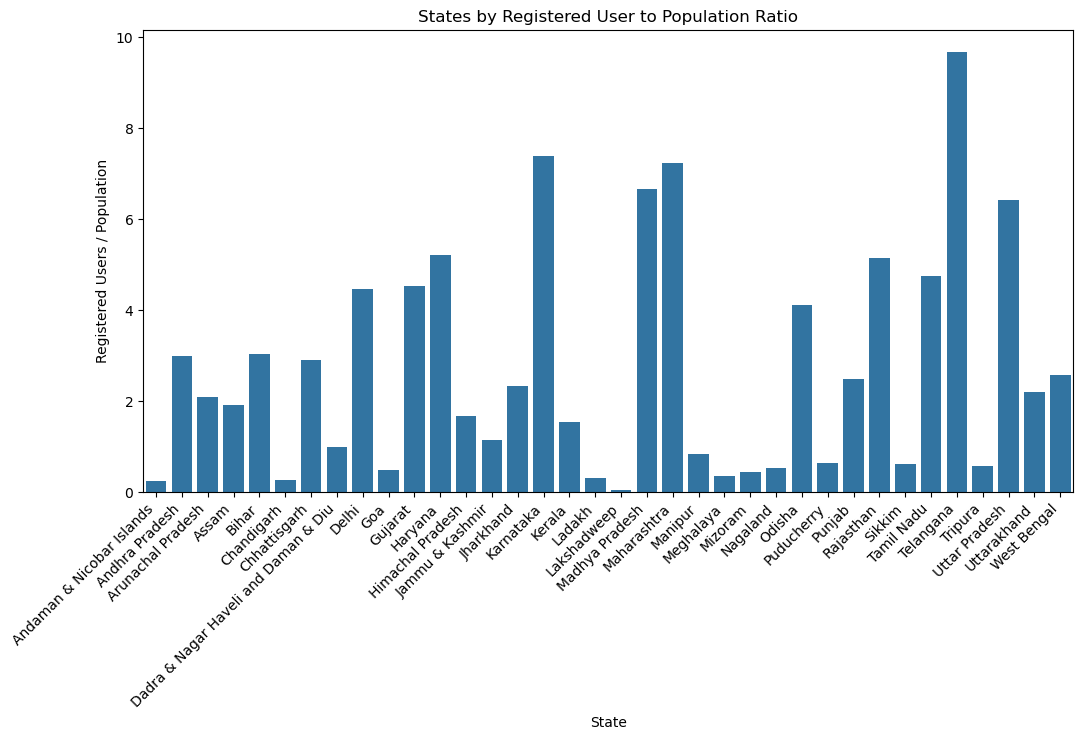

In [661]:
plt.figure(figsize=(12, 6))
sns.barplot(data= demo_sort, x='State',y='pop_ratio')

plt.xticks(rotation=45, ha='right')
plt.title('States by Registered User to Population Ratio')
plt.xlabel('State')
plt.ylabel('Registered Users / Population')
#plt.tight_layout()
plt.show()


In [ ]:
#4.2: corelate population density with transaction volume

In [ ]:
#4.2.1: merge district txn and users dataset with the district demographics dataset

In [663]:
dist_txn_demo=district_txn_users.merge(district_demographics)

In [665]:
dist_txn_demo.head()

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Headquarters,Population,Area (sq km),Density,Alternate Name
0,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0,Port Blair,238142,2672.0,89,South Andaman
1,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0,Port Blair,238142,2672.0,89,South Andaman
2,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0,Port Blair,238142,2672.0,89,South Andaman
3,Andaman & Nicobar Islands,2018,4,South Andaman,AN03,20136,7.541184e+07,3745.125189,13133,0,Port Blair,238142,2672.0,89,South Andaman
4,Andaman & Nicobar Islands,2019,1,South Andaman,AN03,25683,8.550197e+07,3329.127142,15961,0,Port Blair,238142,2672.0,89,South Andaman


In [ ]:
#4.2.2: Calculate correlation between population density and transaction volume. 

In [675]:
rel_data=dist_txn_demo[['Population','Transactions']].corr()
rel_data

,Population,Transactions
Population,1.000000,0.359157
Transactions,0.359157,1.000000


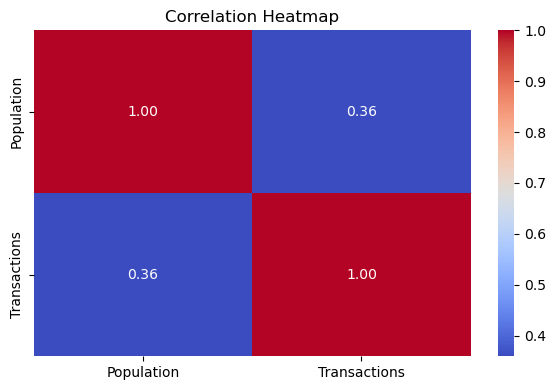

In [1043]:
# heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(rel_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [1051]:
#OBSERVATION: 0.36 Positive correl is a good sign, 
# it means population and transaction of this data have higher potential dependency as population increses transaction volume also increases

In [695]:
#4.2.3: scatter plot between population density and transaction volume for visual correaltion

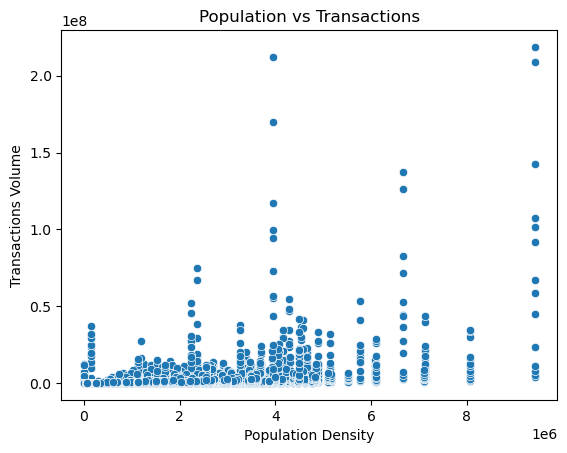

In [819]:
sns.scatterplot(data=dist_txn_demo, x='Population', y='Transactions')
plt.title('Population vs Transactions')
plt.xlabel('Population Density')
plt.ylabel('Transactions Volume')

plt.show()


In [697]:
# 4.3: AVERAGE TRANSACTION AMOUNT PER USER

In [ ]:
# 4.3.1: Merge relevant dataset to calculate average transaction amount per user for each state

In [703]:
state_txn_users.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [725]:
amnt_user_grp=state_txn_users.groupby('State')[['Amount (INR)','Registered Users']].sum().reset_index()
amnt_user_grp

,State,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,3.641818e+09,408396
1,Andhra Pradesh,3.187847e+12,158007957
2,Arunachal Pradesh,2.225183e+10,1862214
3,Assam,2.814087e+11,26860751
4,Bihar,1.639579e+12,115284760
5,Chandigarh,5.371208e+10,3801466
6,Chhattisgarh,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112
8,Delhi,1.649942e+12,95374654
9,Goa,4.427187e+10,4755320


In [741]:
amnt_user_grp['avg_transac_amnt_per_user']= amnt_user_grp['Amount (INR)']/amnt_user_grp['Registered Users']

In [745]:
amnt_user_grp

,State,Amount (INR),Registered Users,avg_transac_amnt_per_user
0,Andaman & Nicobar Islands,3.641818e+09,408396,8917.369075
1,Andhra Pradesh,3.187847e+12,158007957,20175.233763
2,Arunachal Pradesh,2.225183e+10,1862214,11949.126662
3,Assam,2.814087e+11,26860751,10476.576498
4,Bihar,1.639579e+12,115284760,14221.991933
5,Chandigarh,5.371208e+10,3801466,14129.308175
6,Chhattisgarh,4.156353e+11,37448388,11098.884128
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
8,Delhi,1.649942e+12,95374654,17299.587909
9,Goa,4.427187e+10,4755320,9309.966756


In [ ]:
# 4.3.2: Identify 5 largest and 5 smallest avg_transac_amnt_per_user

In [765]:
amnt_user_grp.nlargest(5,'avg_transac_amnt_per_user') # 5 largest

,State,Amount (INR),Registered Users,avg_transac_amnt_per_user
31,Telangana,4.574246e+12,149224214,30653.509622
15,Karnataka,4.361396e+12,203098564,21474.282206
1,Andhra Pradesh,3.187847e+12,158007957,20175.233763
28,Rajasthan,2.625584e+12,149770064,17530.768707
8,Delhi,1.649942e+12,95374654,17299.587909


In [763]:
amnt_user_grp.nsmallest(5,'avg_transac_amnt_per_user') # 5 smallest

,State,Amount (INR),Registered Users,avg_transac_amnt_per_user
18,Lakshadweep,1.921587e+08,34223,5614.898889
32,Tripura,2.097051e+10,3661575,5727.184275
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
16,Kerala,3.729599e+11,51267042,7274.846690
12,Himachal Pradesh,9.786546e+10,13373980,7317.601442


In [ ]:
#4.4: DEVISE BRAND USAGE RATIO

In [ ]:
# 4.4.1: Merge state_device dataset with the State_txn_users

In [789]:
state_user_device=state_device_data.merge(state_txn_users, on='State') 
state_user_device.head()

,State,Year_x,Quarter_x,Brand,Registered Users_x,Percentage,Year_y,Quarter_y,Transactions,Amount (INR),ATV (INR),Registered Users_y,App Opens
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [ ]:
# 4.4.2: calculate the ratio of users using each device to the total number of registered users in each state

In [793]:
state_user_device['User Ratio']= state_user_device['Registered Users_x']/state_user_device['Registered Users_y']

In [795]:
state_user_device[['State', 'Brand', 'User Ratio']].head()

,State,Brand,User Ratio
0,Andaman & Nicobar Islands,Xiaomi,0.247033
1,Andaman & Nicobar Islands,Xiaomi,0.177033
2,Andaman & Nicobar Islands,Xiaomi,0.137048
3,Andaman & Nicobar Islands,Xiaomi,0.109381
4,Andaman & Nicobar Islands,Xiaomi,0.089535


In [822]:
# 4.4.3: create a bar chart to depict the device brand usage ratio of each state

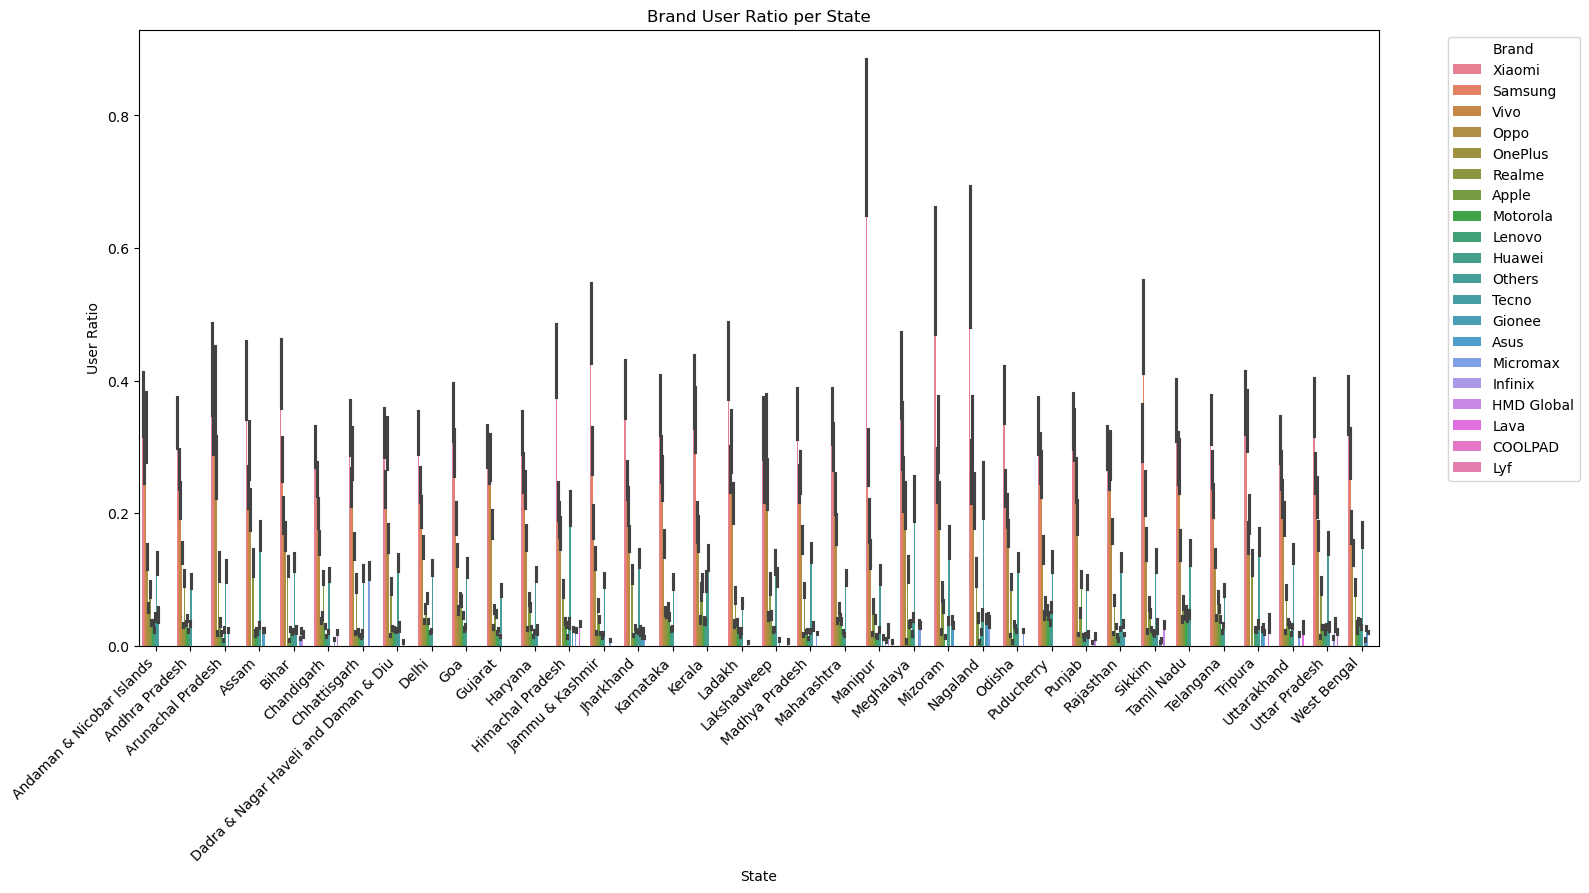

In [821]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))  
sns.barplot(
    data=state_user_device,
    x='State',
    y='User Ratio',
    hue='Brand'
)

plt.title('Brand User Ratio per State')
plt.xlabel('State')
plt.ylabel('User Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()


In [ ]:
# TASK 5: DATA VISUALISATION

In [ ]:
# 5.1: create line plot showing total number of transactions and total transaction amount over time(years and quarters) for a state.

In [825]:
state_txn_users.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [847]:
state_group=state_txn_users.groupby(['State','Year','Quarter'])[['Transactions','Amount (INR)']].sum().reset_index()
state_group

,State,Year,Quarter,Transactions,Amount (INR)
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08
...,...,...,...,...,...
499,West Bengal,2020,2,57676797,1.000994e+11
500,West Bengal,2020,3,79954504,1.568134e+11
501,West Bengal,2020,4,100340645,1.991655e+11
502,West Bengal,2021,1,118254052,2.429372e+11


In [851]:
wb_data=state_group[state_group['State']=='West Bengal']
wb_data

,State,Year,Quarter,Transactions,Amount (INR)
490,West Bengal,2018,1,11710225,1.062598e+10
491,West Bengal,2018,2,18082446,1.862918e+10
492,West Bengal,2018,3,53705416,4.184393e+10
493,West Bengal,2018,4,36513548,4.048962e+10
494,West Bengal,2019,1,47626388,5.016467e+10
495,West Bengal,2019,2,47023535,5.710569e+10
496,West Bengal,2019,3,66444829,7.054053e+10
497,West Bengal,2019,4,96805838,8.820361e+10
498,West Bengal,2020,1,66250381,9.665331e+10
499,West Bengal,2020,2,57676797,1.000994e+11


C:\Users\HP\AppData\Local\Temp\ipykernel_20904\3077048491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb_data['Time'] = wb_data['Year'].astype(str) + '-Q' + wb_data['Quarter'].astype(str)


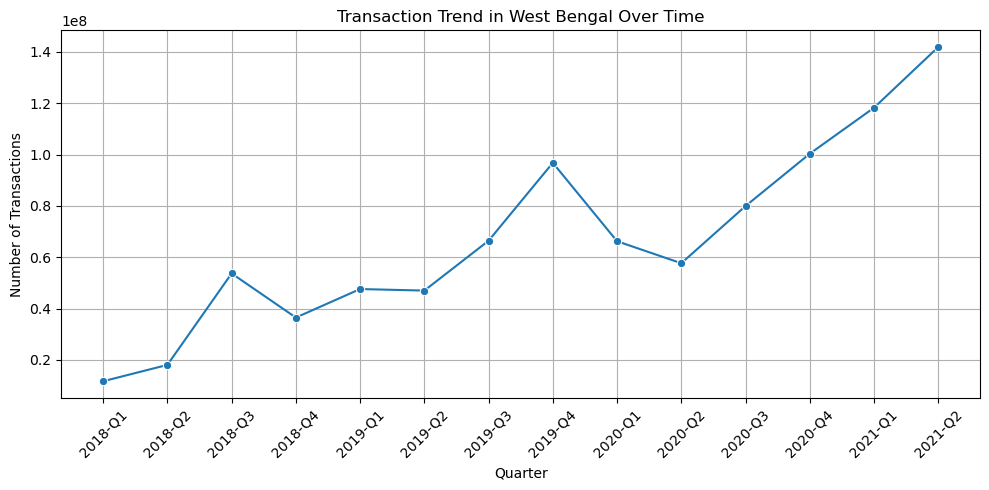

In [959]:
wb_data['Time'] = wb_data['Year'].astype(str) + '-Q' + wb_data['Quarter'].astype(str)

# Line plot (for transactions only)
plt.figure(figsize=(10, 5))
sns.lineplot(data=wb_data, x='Time', y='Transactions', marker='o')

plt.title('Transaction Trend in West Bengal Over Time')
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

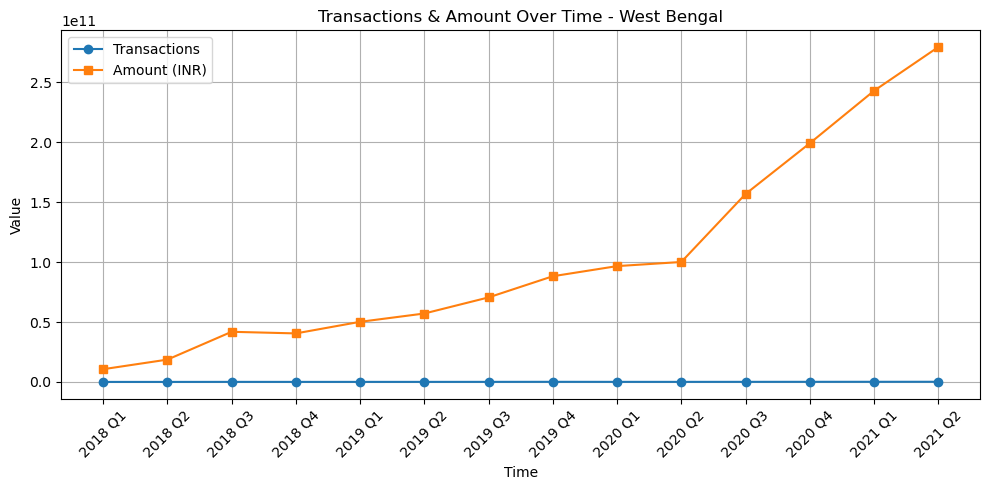

In [957]:
#Line plot for both transactions and amount

wb_data = state_txn_users[state_txn_users['State'] == 'West Bengal']
grouped = wb_data.groupby(['Year', 'Quarter'])[['Transactions', 'Amount (INR)']].sum().reset_index()

# Create a time label
grouped['Time'] = grouped['Year'].astype(str) + ' Q' + grouped['Quarter'].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(grouped['Time'], grouped['Transactions'], label='Transactions', marker='o')
plt.plot(grouped['Time'], grouped['Amount (INR)'], label='Amount (INR)', marker='s')

plt.title('Transactions & Amount Over Time - West Bengal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


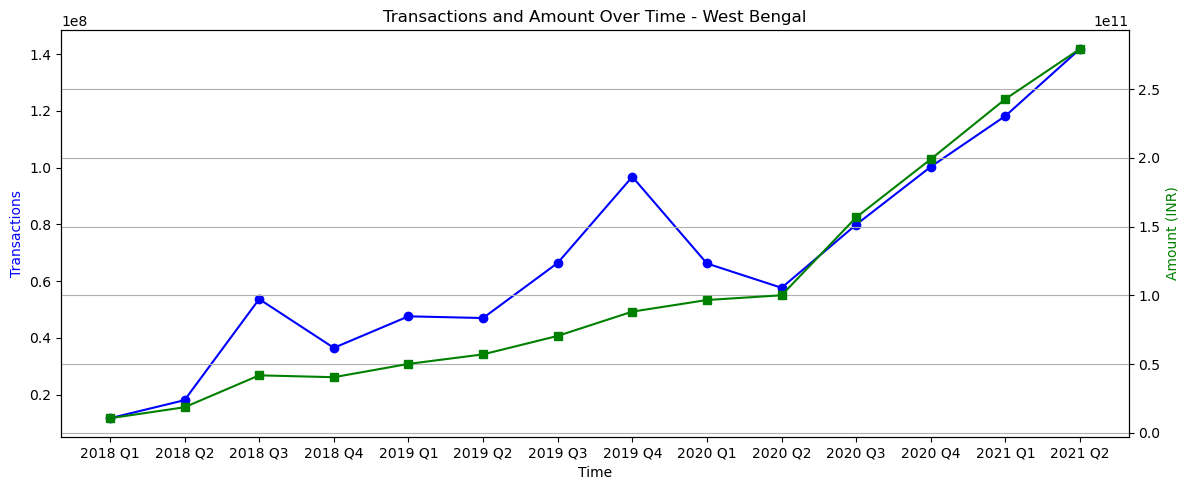

In [961]:
# trying 2 axis since one is flat compared to other

fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()
ax1.plot(grouped['Time'], grouped['Transactions'], color='blue', marker='o', label='Transactions')
ax2.plot(grouped['Time'], grouped['Amount (INR)'], color='green', marker='s', label='Amount (INR)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Transactions', color='blue')
ax2.set_ylabel('Amount (INR)', color='green')
plt.title('Transactions and Amount Over Time - West Bengal')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#OBSERVATION: Before co-vid preciesly from 2018 Q1 - 2020 Q2 the transaction volume was fluctuating and amount was increasing steadily
# after 2020 Q2 both transaction volumes and amount have increased significantly with a steep spike--showing people engagement in digital payments after covid 

In [ ]:
# 5.2: Create a pie chart showing distribution of transaction types for a specific quarters and state

In [963]:
state_txn_split.head()

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


In [917]:
pie_chart=state_txn_split.groupby(['State','Year','Quarter','Transaction Type'])['Transactions'].sum().reset_index()
pie_chart

,State,Year,Quarter,Transaction Type,Transactions
0,Andaman & Nicobar Islands,2018,1,Financial Services,33
1,Andaman & Nicobar Islands,2018,1,Merchant payments,298
2,Andaman & Nicobar Islands,2018,1,Others,256
3,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871
4,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200
...,...,...,...,...,...
2509,West Bengal,2021,2,Financial Services,190537
2510,West Bengal,2021,2,Merchant payments,41696787
2511,West Bengal,2021,2,Others,549353
2512,West Bengal,2021,2,Peer-to-peer payments,64661051


In [919]:
filtered_pie=pie_chart[(pie_chart['State']=='West Bengal') & (pie_chart['Year']==2018) & (pie_chart['Quarter']==4)]
filtered_pie

,State,Year,Quarter,Transaction Type,Transactions
2459,West Bengal,2018,4,Financial Services,734796
2460,West Bengal,2018,4,Merchant payments,8633569
2461,West Bengal,2018,4,Others,565106
2462,West Bengal,2018,4,Peer-to-peer payments,17154995
2463,West Bengal,2018,4,Recharge & bill payments,9425082


In [921]:
sam=filtered_pie[['Transaction Type','Transactions']]
sam

,Transaction Type,Transactions
2459,Financial Services,734796
2460,Merchant payments,8633569
2461,Others,565106
2462,Peer-to-peer payments,17154995
2463,Recharge & bill payments,9425082


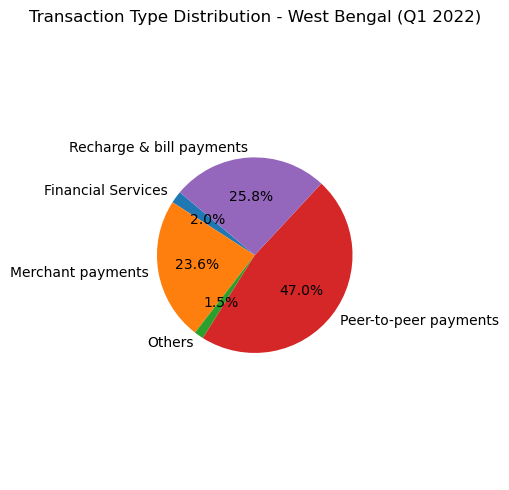

In [965]:
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sam['Transactions'], labels=sam['Transaction Type'], autopct='%1.1f%%', startangle=140)
plt.title('Transaction Type Distribution - West Bengal (Q1 2022)')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


In [ ]:
#OBSERVATION: For West Bengal-2022 Q1-- Peer-to-peer payments has the highest volume of transactions followed by Recharge & bill payments and Merchant payments

In [967]:
# 5.3: Visualise(create a Bar plot) the population density of districts in a selected state

In [929]:
district_demographics.head()

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [937]:
bar_chart=district_demographics.groupby(['State','District'])['Population'].sum().reset_index()
bar_chart

,State,District,Population
0,Andaman & Nicobar Islands,Nicobar,36842
1,Andaman & Nicobar Islands,North and Middle Andaman,105597
2,Andaman & Nicobar Islands,South Andaman,238142
3,Andhra Pradesh,Anantapur,4083315
4,Andhra Pradesh,Chittoor,4170468
...,...,...,...
737,West Bengal,Purba Bardhaman,4835532
738,West Bengal,Purba Medinipur,5095875
739,West Bengal,Purulia,2927965
740,West Bengal,South 24 Parganas,8161961


In [969]:
#filtering west bengal state data only
bar_state= bar_chart[bar_chart['State']=='West Bengal']
bar_state

,State,District,Population
719,West Bengal,Alipurduar,1501983
720,West Bengal,Bankura,3596292
721,West Bengal,Birbhum,3502387
722,West Bengal,Cooch Behar,2822780
723,West Bengal,Dakshin Dinajpur,1670931
724,West Bengal,Darjeeling,1595181
725,West Bengal,Hooghly,5520389
726,West Bengal,Howrah,4841638
727,West Bengal,Jalpaiguri,3869675
728,West Bengal,Jhargram,1136548


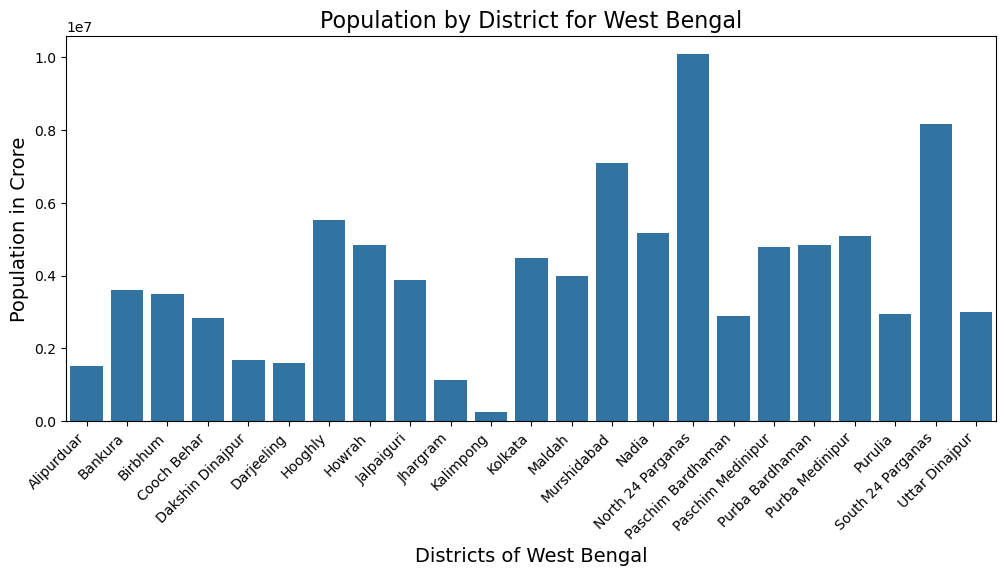

In [971]:
plt.figure(figsize=(12, 5))
sns.barplot(data=bar_state,x='District', y='Population')

plt.title('Population by District for West Bengal', fontsize=16)
plt.xlabel('Districts of West Bengal', fontsize=14)
plt.ylabel('Population in Crore', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#OBSERVATION: North-24 Parganas having the largest population of more than 1cr, followed by South-24 Parganas and Murshidabad

In [ ]:
# TASK 6: INSIGHTS AND CONCLUSIONS[ADVANCE SECTION]

In [ ]:
# 6.1: identify any trends or patterns in the transaction data

In [989]:
delhi_data=state_txn_users[state_txn_users['State']=='Delhi']
delhi_data

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
112,Delhi,2018,1,7122754,1.121150e+10,1574.040576,2087022,0
113,Delhi,2018,2,9373723,1.744630e+10,1861.192175,2756141,0
114,Delhi,2018,3,18547048,2.737585e+10,1476.021783,3504911,0
115,Delhi,2018,4,29187719,3.972286e+10,1360.944225,4630313,0
116,Delhi,2019,1,47007327,5.846913e+10,1243.830175,5499263,0
117,Delhi,2019,2,57171512,8.170682e+10,1429.152618,6165448,43731570
118,Delhi,2019,3,69537876,1.031968e+11,1484.037448,6782286,163381027
119,Delhi,2019,4,80744997,1.290245e+11,1597.925224,7289883,172682671
120,Delhi,2020,1,81747604,1.336165e+11,1634.501039,7826197,178263986
121,Delhi,2020,2,66042018,1.078734e+11,1633.406148,8391139,142852253


In [993]:
delhi_data_sort=delhi_data.groupby(['Year','Quarter'])[['Transactions','Amount (INR)']].sum().reset_index()
delhi_data_sort

,Year,Quarter,Transactions,Amount (INR)
0,2018,1,7122754,1.121150e+10
1,2018,2,9373723,1.744630e+10
2,2018,3,18547048,2.737585e+10
3,2018,4,29187719,3.972286e+10
4,2019,1,47007327,5.846913e+10
5,2019,2,57171512,8.170682e+10
6,2019,3,69537876,1.031968e+11
7,2019,4,80744997,1.290245e+11
8,2020,1,81747604,1.336165e+11
9,2020,2,66042018,1.078734e+11


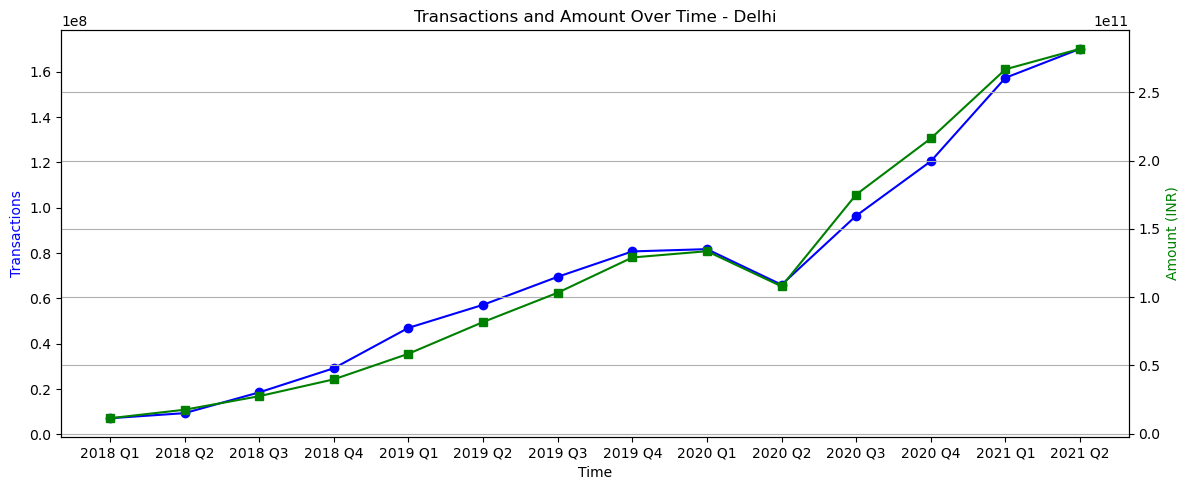

In [997]:
# trying 2 axis since one is flat compared to other

fig, ax1 = plt.subplots(figsize=(12, 5))

grouped['Time'] = delhi_data_sort['Year'].astype(str) + ' Q' + delhi_data_sort['Quarter'].astype(str)


ax2 = ax1.twinx()
ax1.plot(grouped['Time'], delhi_data_sort['Transactions'], color='blue', marker='o', label='Transactions')
ax2.plot(grouped['Time'], delhi_data_sort['Amount (INR)'], color='green', marker='s', label='Amount (INR)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Transactions', color='blue')
ax2.set_ylabel('Amount (INR)', color='green')
plt.title('Transactions and Amount Over Time - Delhi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#OBSERVATION: 1: Pre covid transac vol was large compared to amount vol
#             2: Intial stage of Covid lockdown imapcted- evident from (2020 Q1-2020 Q2) steep FALL 
#             3: After covid transac and amount volume spiked so on that amount of INR crossed the total transac vol.
#                this shows the digitalisation boom after covid and people reliance on digital payments

In [975]:
state_txn_split.head()

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


In [999]:
delhi_data_2=state_txn_split[state_txn_split['State']=='Delhi']
delhi_data_2

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
560,Delhi,2018,1,Recharge & bill payments,3947297,1.320560e+09,334.547822
561,Delhi,2018,1,Peer-to-peer payments,2380820,9.125685e+09,3833.000872
562,Delhi,2018,1,Merchant payments,339809,3.753931e+08,1104.717989
563,Delhi,2018,1,Financial Services,136240,4.558843e+07,334.618535
564,Delhi,2018,1,Others,318588,3.442775e+08,1080.635538
...,...,...,...,...,...,...,...
625,Delhi,2021,2,Merchant payments,75620295,4.293337e+10,567.749263
626,Delhi,2021,2,Peer-to-peer payments,68497718,2.230350e+11,3256.093225
627,Delhi,2021,2,Recharge & bill payments,25026678,1.531010e+10,611.751047
628,Delhi,2021,2,Financial Services,158170,1.900198e+08,1201.364111


In [1009]:
delhi_data_2_sort=delhi_data_2.groupby(['Year','Quarter','Transaction Type'])[['Transactions','Amount (INR)']].sum().reset_index()
delhi_data_2_sort

,Year,Quarter,Transaction Type,Transactions,Amount (INR)
0,2018,1,Financial Services,136240,4.558843e+07
1,2018,1,Merchant payments,339809,3.753931e+08
2,2018,1,Others,318588,3.442775e+08
3,2018,1,Peer-to-peer payments,2380820,9.125685e+09
4,2018,1,Recharge & bill payments,3947297,1.320560e+09
...,...,...,...,...,...
65,2021,2,Financial Services,158170,1.900198e+08
66,2021,2,Merchant payments,75620295,4.293337e+10
67,2021,2,Others,854403,4.726592e+08
68,2021,2,Peer-to-peer payments,68497718,2.230350e+11


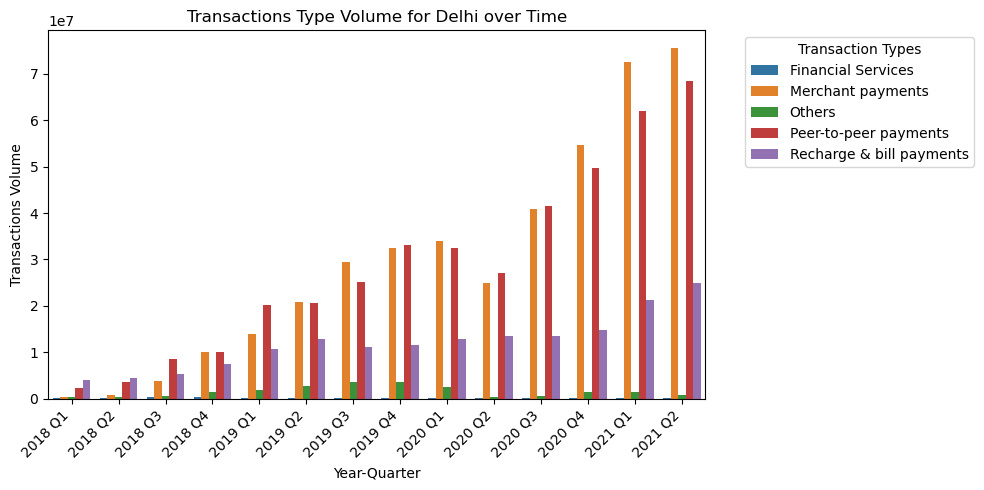

In [1023]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a period column to delhi_data_2_sort
delhi_data_2_sort['period'] = delhi_data_2_sort['Year'].astype(str) + ' Q' + delhi_data_2_sort['Quarter'].astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=delhi_data_2_sort,
    x='period',
    y='Transactions',
    hue='Transaction Type'
)

plt.title('Transactions Type Volume for Delhi over Time')
plt.xlabel('Year-Quarter')
plt.ylabel('Transactions Volume')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


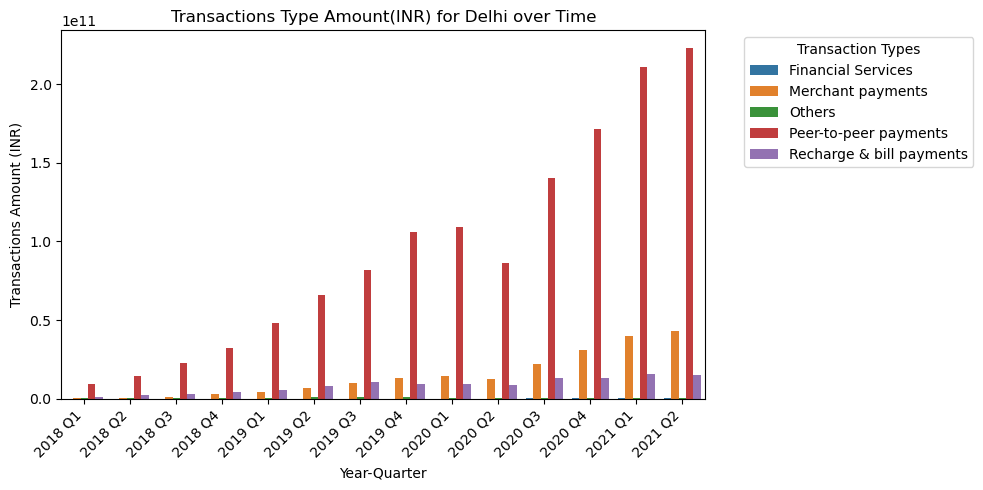

In [1027]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a period column to delhi_data_2_sort
delhi_data_2_sort['period'] = delhi_data_2_sort['Year'].astype(str) + ' Q' + delhi_data_2_sort['Quarter'].astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=delhi_data_2_sort,
    x='period',
    y='Amount (INR)',
    hue='Transaction Type'
)

plt.title('Transactions Type Amount(INR) for Delhi over Time')
plt.xlabel('Year-Quarter')
plt.ylabel('Transactions Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 6.2: Correlate Demographic data(population density) with transaction data(transaction volume)

In [1045]:
pop_tran=district_demographics.merge(district_txn_users, on='State')
pop_tran

,State,District_x,Headquarters,Population,Area (sq km),Density,Code_x,Alternate Name,Year,Quarter,District_y,Code_y,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur,2018,1,Anantapur,AP01,638664,7.888306e+08,1235.126210,241192,0
1,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur,2018,1,Chittoor,AP02,830324,1.009622e+09,1215.937246,309541,0
2,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur,2018,1,East Godavari,AP03,943935,1.235786e+09,1309.184971,350356,0
3,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur,2018,1,Guntur,AP04,815932,1.108687e+09,1358.797779,317065,0
4,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur,2018,1,Krishna,AP05,863935,1.284255e+09,1486.518291,323673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339999,Puducherry,Yanam,Yanam,55626,30.0,1854,PY04,Yanam,2021,1,Yanam,PY04,178609,3.752224e+08,2100.803496,13005,612423
340000,Puducherry,Yanam,Yanam,55626,30.0,1854,PY04,Yanam,2021,2,Karaikal,PY01,169944,3.525285e+08,2074.380100,36328,493882
340001,Puducherry,Yanam,Yanam,55626,30.0,1854,PY04,Yanam,2021,2,Mahe,PY02,52427,8.674822e+07,1654.647750,9887,101963
340002,Puducherry,Yanam,Yanam,55626,30.0,1854,PY04,Yanam,2021,2,Puducherry,PY03,3316123,5.610650e+09,1691.930571,309892,4103659


In [1047]:
cor_new=pop_tran[['Population','Transactions']].corr()
cor_new

,Population,Transactions
Population,1.000000,0.039538
Transactions,0.039538,1.000000


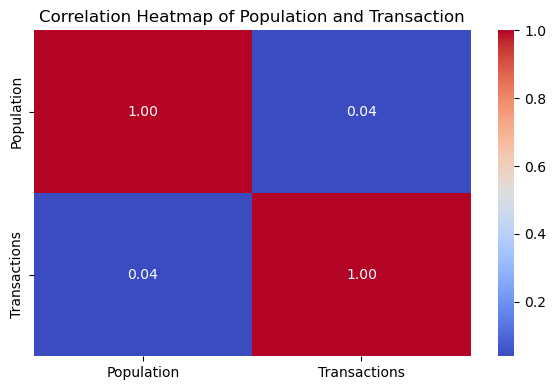

In [1049]:
# heatmap for correlation
plt.figure(figsize=(6, 4))
sns.heatmap(cor_new, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Population and Transaction')
plt.tight_layout()
plt.show()

In [ ]:
#OBSERVATION:  correlation between Population and Transactions, is 0.04, it suggests:
# 1 : Changes in population does not have a meaningful effect on transaction volume.
# 2 : Close to 0, indicating almost no linear relationship
# 3 : As one variable increases, the other might slightly increase — but the effect is minimal,The two variables are mostly unrelated in a linear sense

#REASONING: 
# 1 : wide demographic distribution with large disparity in income and technology accessesibility 
# 2 : The population volume and transaction volume cancels out each other
# 3 : Developed state participate in more technological payment mode 
# 4 : Metro city transaction and district level transaction varies in terms of population

In [ ]:
# 6.3: Summarise findings and insight  

In [ ]:
# FINDINGS
Digital transaction trend is increasing
merchant transaction, peer-to-peer transaction and Recharge & bill payments amongst highest
volume of transaction doesnt depend on population(for Geographically populated and advancement state)
Advanced states specially State- KARNATAKA, MAHARASHTRA, TELANGANA , ANDHRA PRADESH have higher amount transaction followed by
    UTTAR PRADESH, MADHYA PRADESH(basd on latest quarteres)
small population state have proportionate number of transaction according to their population
Overall Correl between TRansaction and population is low but (+ve) which in future holds potential of increment

In [ ]:
# RECOMMENDATIONS:
Inclusion of low performing states in digital market-
   incentivising Merchants to promote inclusion(low engagement state)
    
Engagement is huge but the inclusion of financial services is almost negligable which pertains potential of profit making
today people are more inclined towards digital payments and phone pe users are increasing, now it has created a market base of its own

Phone Pe can initialise its various products in financial sector-
  since its max population does petty transaction, Phone pe can indulge people in investing petty schemes with low risk.
  this petty transaction will turn into huge investment which will leverage its large market acquisation 

# SUGGESTION
Product such as-
 Health insurance
 General insurance
 Bike inssurance
 soverign Gold
 liquid funds (for small time period)

Most of all marketing Phone pe as a all rounder tool for all kinds of financial servises rather than just being digital payment platform 
